In [1]:
################################################################################################
#name:correlacao e markowitz.py
#desc:correlacao e calculo carteira markowitz. Dados semanais ou mensais
#Author:ThalesM
#
################################################################################################
#import statsmodels.api as sm # import statsmodels 
import pandas as pd
import numpy as np, numpy.random
from pandas_datareader import data as wb
import seaborn as sns
import datetime
from datetime import datetime
import time
import matplotlib.pyplot as plt
import math
#import cufflinks as cf
#import plotly.offline
#cf.go_offline()
#cf.set_config_file(offline=False, world_readable=True)
%matplotlib inline
Lista=['PETR4.SA','WEGE3.SA']
Periodo='2018-07-30'
dados=''
#Lista=['GUAR3.SA','ITUB4.SA','RAIL3.SA']
Rf1=6/100
Rf=0
def consulta_bc(codigo_bcb):
  url = 'http://api.bcb.gov.br/dados/serie/bcdata.sgs.{}/dados?formato=json'.format(codigo_bcb)
  PG = pd.read_json(url)
  df=pd.DataFrame(PG)  
  df['data'] = pd.to_datetime(df['data'], dayfirst=True)
  df.set_index('data', inplace=True)
  return df

def retornos(Acao):
    fim='2015-07-01'
    PG = wb.DataReader(Acao, data_source="yahoo", start=Periodo)
    df=pd.DataFrame(PG)
    del df['High']
    del df['Close']
    del df['Low']
    del df['Open']
    del df['Volume']
    if dados=='M' or dados=='W':
        df=df.resample(dados).last()
    #print(df)
    chg=df['Adj Close'].pct_change()
    chg.column=['Acao']
    #print (type(chg))
    return (chg)

bovespa=pd.DataFrame()
bovespa['^BVSP']=retornos('^BVSP')

tamanhoLista=len(Lista)

#cálculo Rf pro sharpe
if dados=='M':
    Rf=(1+Rf1)**(1/12)-1
if dados=='W':
    Rf=(1+Rf1)**(1/52)-1 
print(Rf)
dfretornos=pd.DataFrame()
pesos=pd.DataFrame(Lista)
for papel in Lista:
    
    dfretornos[papel]=retornos(papel)


dataCorr = dfretornos.corr()
for papel in Lista:
    pesos['Pesos']=1/tamanhoLista
pesos.rename(columns={0:'Ativos'}, inplace = True)
pesos=pesos.set_index('Ativos')



av=pd.Series(dfretornos.mean(axis=0))
std=dfretornos.std(axis=0)
cov=dfretornos.cov()
matrixav=np.array(av)[np.newaxis]
corr=dfretornos.corr()


#print(dfretornos)
#sns.heatmap(dataCorr, annot=True)
#plt.show()


dataCorr = dataCorr[abs(dataCorr) >= 0.01].stack().reset_index()
dataCorr = dataCorr[dataCorr['level_0'].astype(str)!=dataCorr['level_1'].astype(str)]
 
# filtering out lower/upper triangular duplicates 
dataCorr['ordered-cols'] = dataCorr.apply(lambda x: '-'.join(sorted([x['level_0'],x['level_1']])),axis=1)
dataCorr = dataCorr.drop_duplicates(['ordered-cols'])
dataCorr.drop(['ordered-cols'], axis=1, inplace=True)
print('Correlação entre ativos') 
print(dataCorr.sort_values(by=[0], ascending=False))

print('Média sem ponderação das correlações')
print(dataCorr[0].mean())
#sns.distplot(dfretornos['SGPS3.SA'],kde=False,bins=50)


Bad key text.latex.unicode in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key text.dvipnghack in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 127 ("text.dvipnghack : None      # some versions of dvipng don't handle alpha")
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file C:\Users\andre\Anaconda35\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 430 ('savefig.frameon : True')
You probably need to get an updated 

0
Correlação entre ativos
    level_0   level_1         0
1  PETR4.SA  WEGE3.SA  0.450667
Média sem ponderação das correlações
0.45066693699594584


In [2]:
dfretornos.describe()

,PETR4.SA,WEGE3.SA
count,643.000000,643.000000
mean,0.000954,0.002538
std,0.033650,0.027048
min,-0.296978,-0.206197
25%,-0.012912,-0.010650
50%,0.000880,0.003284
75%,0.015075,0.015386
max,0.222222,0.138945


In [3]:
print(dfretornos)

            PETR4.SA  WEGE3.SA
Date                          
2018-07-30       NaN       NaN
2018-07-31 -0.008547 -0.004839
2018-08-01  0.014706 -0.010805
2018-08-02  0.019990 -0.019115
2018-08-03  0.034297  0.009465
...              ...       ...
2021-03-09  0.023223  0.033984
2021-03-10  0.034738  0.010909
2021-03-11  0.042525 -0.004981
2021-03-12 -0.005152 -0.010706
2021-03-16  0.009063  0.018131

[644 rows x 2 columns]


In [4]:
#sns.distplot(dfretornos['BRFS3.SA'],kde=False,bins=50)

In [5]:
#av.head()

In [6]:
#print(std)

In [7]:
#print(cov)

In [8]:
#print(len(Lista))

In [9]:
#print(matrixav)

In [10]:
matrixpesos=np.array([pesos['Pesos']])

In [11]:
print(matrixpesos)

[[0.5 0.5]]


In [12]:
retornoport=matrixpesos @ matrixav.T
print("Retorno Pesos iguais")
print (retornoport[0][0])

Retorno Pesos iguais
0.0017463389172780617


In [13]:
varport=(matrixpesos @ cov) @ matrixpesos.T
print(varport)

          0
0  0.000671


In [14]:
stdport=math.sqrt((varport[0][0]))
print("Std Pesos iguais")
print(stdport)

Std Pesos iguais
0.025904876160601005


In [15]:
print("Sharpe Pesos iguais")
print((retornoport[0][0]-Rf)/stdport)

Sharpe Pesos iguais
0.06741352116301898


In [16]:
#comeco segunda iteração
matrixpesos=np.random.dirichlet(np.ones(len(Lista)),size=1)
print(matrixpesos)

[[0.93212267 0.06787733]]


In [17]:
retornoport=matrixpesos @ matrixav.T
print (retornoport[0][0])

0.0010617593193178467


In [18]:
varport=(matrixpesos @ cov) @ matrixpesos.T
stdport=math.sqrt((varport[0][0]))
print(stdport)

0.03223471663154755


In [19]:
teste=np.random.dirichlet(np.ones(len(Lista)),size=1)
print (teste)

[[0.28575737 0.71424263]]


In [20]:
print (np.sum(teste))

1.0


In [21]:
vol=0
dfgraph=pd.DataFrame()
dfgraph['Corr Port']=''
dfgraph['Retorno anualizado']=''
dfgraph['Vol anualizada']=''
dfgraph['Retorno Período: '+dados]=''
dfgraph['Std']=''
dfgraph['Sharpe']=''
for i in Lista:
    dfgraph[i]=""
dfgraph.head()
corrport=0
j=0
n=1000
while j<len(Lista)*n:
    matrixpesos=np.random.dirichlet(np.ones(len(Lista)),size=1)
    retornoport=matrixpesos @ matrixav.T
    varport=(matrixpesos @ cov) @ matrixpesos.T
    corrport=(matrixpesos @ corr) @ matrixpesos.T
    stdport=math.sqrt((varport[0][0]))
    #sharpe=(retornoport-Rf)/stdport
    vol=stdport*math.sqrt(252)
    retornoanualizado=((1+retornoport)**(252)-1)
    if dados=='M':
        retornoanualizado=((1+retornoport)**(12)-1)
        vol=stdport*math.sqrt(12)
    elif dados=='W':
        retornoanualizado=((1+retornoport)**(52)-1)
        vol=stdport*math.sqrt(52)
                           
    sharpe=(retornoport-Rf)/stdport
    to_append=[corrport[0][0], retornoanualizado[0][0],vol,retornoport[0][0], stdport, sharpe[0][0]]
    #print(matrixpesos[0])
    #print(to_append)
    to_append=to_append + list(matrixpesos[0])
    #print(to_append)
    a_series=pd.Series(to_append, index=dfgraph.columns)
    dfgraph=dfgraph.append(a_series,ignore_index=True)
    j=j+1
    #print(j)
dfgraph.head()    

,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
0,0.903718,0.822534,0.413663,0.002385,0.026058,0.091514,0.097055,0.902945
1,0.732620,0.603433,0.403272,0.001875,0.025404,0.073822,0.418562,0.581438
2,0.755150,0.453583,0.439181,0.001485,0.027666,0.053689,0.664739,0.335261
3,0.768819,0.680292,0.399283,0.002062,0.025152,0.081961,0.301052,0.698948
4,0.861235,0.349170,0.486982,0.001189,0.030677,0.038764,0.851706,0.148294


In [22]:
min_std=dfgraph.sort_values(by='Std', ascending=True)
print('Mínimo Desvio')




Mínimo Desvio


In [23]:

std_min=min_std['Std'].iloc[0]
ret_min=min_std['Retorno Período: '+dados].iloc[0]

In [24]:
min_std.head()

,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
1733,0.765634,0.675330,0.399267,0.002050,0.025151,0.081497,0.308475,0.691525
1147,0.765620,0.675308,0.399267,0.002050,0.025151,0.081494,0.308508,0.691492
1212,0.766309,0.676396,0.399268,0.002052,0.025151,0.081597,0.306879,0.693121
996,0.766344,0.676450,0.399268,0.002052,0.025151,0.081602,0.306797,0.693203
301,0.766374,0.676498,0.399268,0.002053,0.025151,0.081607,0.306726,0.693274


In [25]:
max_return=dfgraph.sort_values(by='Retorno Período: '+dados, ascending=False)
print('Máximo Retorno')
max_return.head()

Máximo Retorno


,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
1890,0.999990,0.894350,0.429372,0.002538,0.027048,0.093850,0.000009,0.999991
1161,0.997226,0.892448,0.428898,0.002534,0.027018,0.093806,0.002531,0.997469
1539,0.995967,0.891579,0.428682,0.002533,0.027004,0.093785,0.003685,0.996315
1394,0.994976,0.890894,0.428513,0.002531,0.026994,0.093769,0.004594,0.995406
1375,0.994934,0.890865,0.428506,0.002531,0.026993,0.093768,0.004633,0.995367


In [26]:
max_return=dfgraph.sort_values(by='Sharpe', ascending=False)
print('Máximo Sharpe')
max_return.head()

Máximo Sharpe


,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
1890,0.999990,0.894350,0.429372,0.002538,0.027048,0.093850,0.000009,0.999991
1161,0.997226,0.892448,0.428898,0.002534,0.027018,0.093806,0.002531,0.997469
1539,0.995967,0.891579,0.428682,0.002533,0.027004,0.093785,0.003685,0.996315
1394,0.994976,0.890894,0.428513,0.002531,0.026994,0.093769,0.004594,0.995406
1375,0.994934,0.890865,0.428506,0.002531,0.026993,0.093768,0.004633,0.995367


In [27]:
#dfgraph.iplot(theme="white",x="Std",y='Retorno Período: '+dados,kind='scatter', mode='markers',title="Estudo Markowitz")

In [28]:
#meio=(dfgraph['Std'].min()+dfgraph['Std'].max())/2
meio=dfgraph['Std'].mean()
print("Média Std")
print(meio)
escolha=dfgraph.iloc[(dfgraph['Std']-meio).abs().argsort()[:5]]
escolha=escolha.sort_values(by='Retorno anualizado', ascending=False)

Média Std
0.027374501264058014


In [29]:
escolha.head()

,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
675,0.747409,0.466965,0.434402,0.001522,0.027365,0.055611,0.641750,0.358250
833,0.747517,0.466762,0.434472,0.001521,0.027369,0.055582,0.642097,0.357903
495,0.747687,0.466446,0.434582,0.001520,0.027376,0.055536,0.642638,0.357362
1829,0.747884,0.466079,0.434709,0.001519,0.027384,0.055484,0.643266,0.356734
376,0.747910,0.466031,0.434726,0.001519,0.027385,0.055477,0.643348,0.356652


In [30]:
dfretornos.columns

Index(['PETR4.SA', 'WEGE3.SA'], dtype='object')

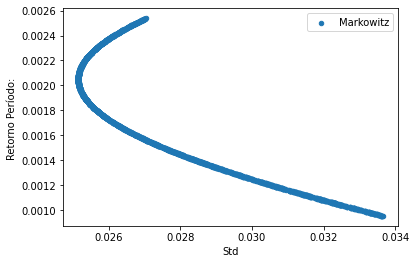

In [31]:
dfgraph.plot(x ='Std', y='Retorno Período: '+dados, kind = 'scatter',label='Markowitz')
plt.show()

In [32]:
vol

0.3993605940903461

In [33]:
min_corr=dfgraph.sort_values(by='Corr Port', ascending=True)
print('Mínima Correlacao')
min_corr.head()

Mínima Correlacao


,Corr Port,Retorno anualizado,Vol anualizada,Retorno Período:,Std,Sharpe,PETR4.SA,WEGE3.SA
561,0.725333,0.552322,0.411209,0.001747,0.025904,0.067425,0.499853,0.500147
1771,0.725333,0.552332,0.411207,0.001747,0.025904,0.067427,0.499838,0.500162
1777,0.725334,0.552338,0.411206,0.001747,0.025904,0.067428,0.499827,0.500173
480,0.725334,0.552493,0.411175,0.001747,0.025902,0.067448,0.499577,0.500423
631,0.725334,0.551796,0.411314,0.001745,0.025910,0.067356,0.500704,0.499296


In [34]:
retornoport

array([[0.00207719]])

In [35]:
ibov_acumulado=(1+bovespa['^BVSP']).cumprod()
ibov_acumulado.iloc[0]=1


In [53]:
ibov_acumulado

Date
2018-07-30    1.000000
2018-07-31    0.986845
2018-08-01    0.987867
2018-08-02    0.992040
2018-08-03    1.014438
                ...   
2021-03-10    1.404853
2021-03-11    1.432358
2021-03-12    1.422094
2021-03-15    1.430702
2021-03-16    1.421104
Name: ^BVSP, Length: 645, dtype: float64

In [37]:
del min_std['Corr Port']
del min_std['Retorno anualizado']
del min_std['Vol anualizada']
del min_std['Retorno Período: '+dados]
del min_std['Std']
del min_std['Sharpe']

In [38]:
pesos_min=pd.Series(min_std.iloc[0])

In [39]:
pesos_min

PETR4.SA    0.308475
WEGE3.SA    0.691525
Name: 1733, dtype: float64

In [40]:
retorno_min=dfretornos*pesos_min

In [41]:
#retorno_min

In [52]:
dfretornos

,PETR4.SA,WEGE3.SA
Date,,
2018-07-30,NaN,NaN
2018-07-31,-0.008547,-0.004839
2018-08-01,0.014706,-0.010805
2018-08-02,0.019990,-0.019115
2018-08-03,0.034297,0.009465
...,...,...
2021-03-09,0.023223,0.033984
2021-03-10,0.034738,0.010909
2021-03-11,0.042525,-0.004981


In [43]:
#pesos_min

In [44]:
historico=retorno_min.sum(axis=1)
#historico

In [45]:
historico_acumulado=(1+historico).cumprod()
historico_acumulado.iloc[0]=1

In [46]:
#historico_acumulado

In [47]:
cdi=consulta_bc(12)
cdi_acumulado=(1+cdi[cdi.index>=Periodo]/100).cumprod()
cdi_acumulado.iloc[0]=1

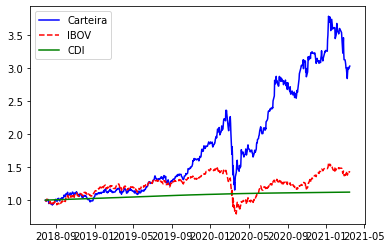

In [48]:
fig, ax = plt.subplots()
ax.plot(historico_acumulado,  '-b', label='Carteira')
ax.plot(ibov_acumulado,  '--r', label='IBOV')
ax.plot(cdi_acumulado,  '-g', label='CDI')
leg = ax.legend();

In [49]:
pesos_min

PETR4.SA    0.308475
WEGE3.SA    0.691525
Name: 1733, dtype: float64

In [50]:
std_min

0.025151469037428

In [51]:
ret_min

0.0020497572678044467